In [ ]:
#  Google Colab Notebook Code for RD INFRO Internship: Customer Churn Analysis
#  TASK 0: Upload CSV File

from google.colab import files
uploaded = files.upload()


#  TASK 1: Data Cleaning and Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('customer_churn.csv')  # Make sure filename matches upload

# Drop rows with missing values
df = df.dropna()

# Convert 'Churn' to binary
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Segment tenure
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72],
                           labels=['0-1 yr', '1-2 yr', '2-4 yr', '4-6 yr'])
print(df.head())
print(df.info())

Saving customer_churn.csv to customer_churn (8).csv
   SeniorCitizen  tenure  MonthlyCharges  Churn  TotalCharges  \
0              0      47           91.77      1       4313.19   
1              0      12          117.66      0       1411.92   
2              0      62           57.72      1       3578.64   
3              1       8          100.18      0        801.44   
4              0      21           63.45      1       1332.45   

   customerID_CUST0001  customerID_CUST0002  customerID_CUST0003  \
0                False                False                False   
1                 True                False                False   
2                False                 True                False   
3                False                False                 True   
4                False                False                False   

   customerID_CUST0004  customerID_CUST0005  ...  StreamingTV_Yes  \
0                False                False  ...            False   
1         

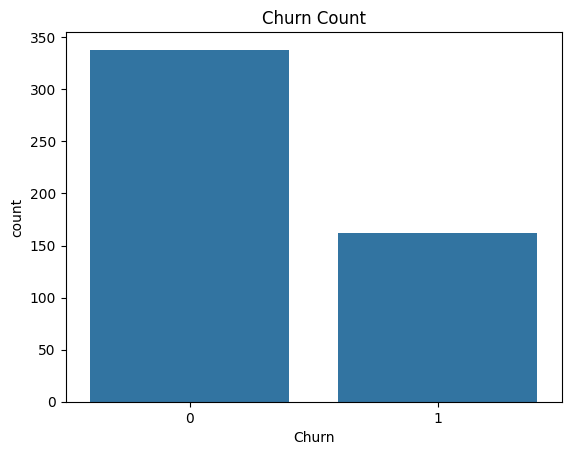

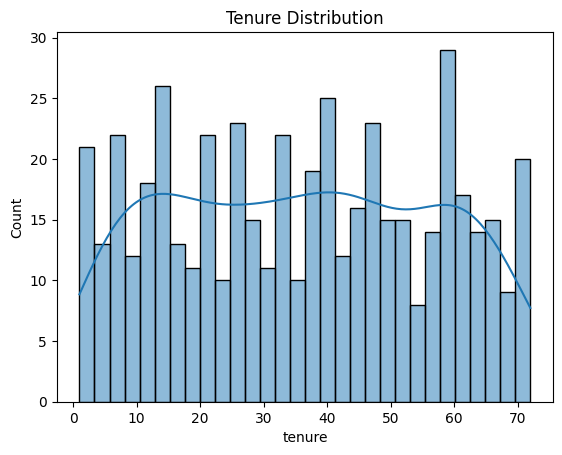

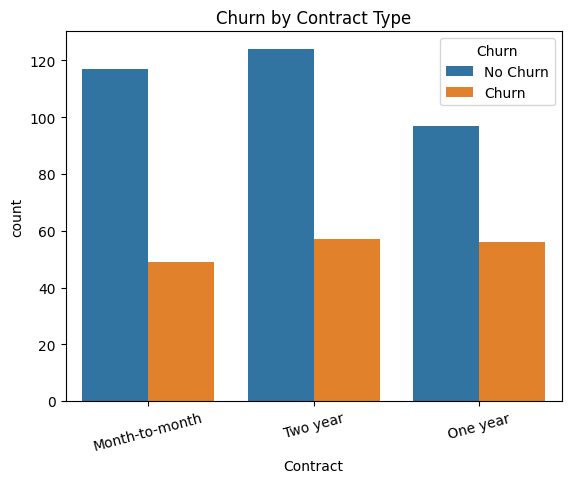

In [ ]:

#  TASK 2: Exploratory Data Analysis (EDA)

# Churn Count
sns.countplot(x='Churn', data=df)
plt.title("Churn Count")
plt.show()

# Tenure Distribution
sns.histplot(df['tenure'], kde=True, bins=30)
plt.title("Tenure Distribution")
plt.show()

# Reload original file for contract-churn plot
df_plot_contract = pd.read_csv('customer_churn.csv').dropna()
df_plot_contract['Churn'] = df_plot_contract['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

sns.countplot(x='Contract', hue='Churn', data=df_plot_contract)
plt.title("Churn by Contract Type")
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.xticks(rotation=15)
plt.show()


Churn               0         1
TenureGroup                    
0-1 yr       0.674419  0.325581
1-2 yr       0.719512  0.280488
2-4 yr       0.676136  0.323864
4-6 yr       0.653846  0.346154


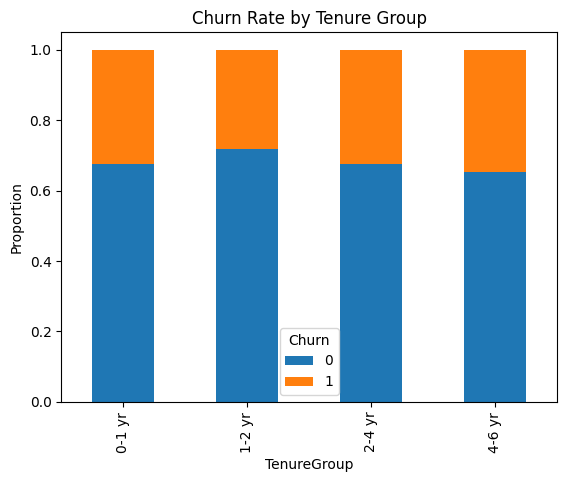

In [ ]:

#  TASK 3: Customer Segmentation

segment_churn = df.groupby('TenureGroup', observed=False)['Churn'].value_counts(normalize=True).unstack()
print(segment_churn)

segment_churn.plot(kind='bar', stacked=True)
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Proportion")
plt.show()



In [ ]:

#  TASK 4: Churn Prediction Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(['Churn', 'TenureGroup'], axis=1, errors='ignore')
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[66  0]
 [34  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.80        66
           1       0.00      0.00      0.00        34

    accuracy                           0.66       100
   macro avg       0.33      0.50      0.40       100
weighted avg       0.44      0.66      0.52       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

#  TASK 5: Customer Retention Strategies

# Identify key factors that influence churn
importances = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print("\nTop Factors Influencing Churn:\n")
print(importances.head(10))

# Estimate Lifetime Value (LTV)
avg_monthly_revenue = df['MonthlyCharges'].mean()
avg_tenure_months = df['tenure'].mean()
ltv = avg_monthly_revenue * avg_tenure_months
print(f"\nEstimated Customer Lifetime Value (LTV): ₹{ltv:.2f}")

# Identify high-value customers at risk
high_value_risk = df[(df['MonthlyCharges'] > avg_monthly_revenue) & (df['Churn'] == 1)]
print(f"\nHigh-value customers at risk of churning: {len(high_value_risk)}")


Top Factors Influencing Churn:

customerID_CUST0418    0.336939
customerID_CUST0142    0.319898
customerID_CUST0430    0.315777
customerID_CUST0419    0.311341
customerID_CUST0074    0.310057
customerID_CUST0425    0.308627
customerID_CUST0004    0.307659
customerID_CUST0340    0.307178
customerID_CUST0320    0.307085
customerID_CUST0402    0.306196
dtype: float64

Estimated Customer Lifetime Value (LTV): ₹2491.37

High-value customers at risk of churning: 70


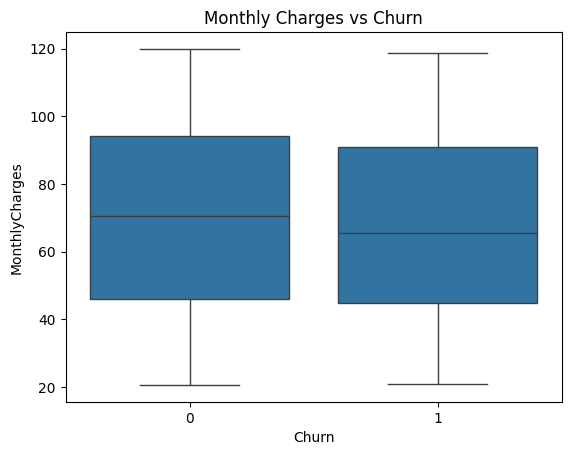

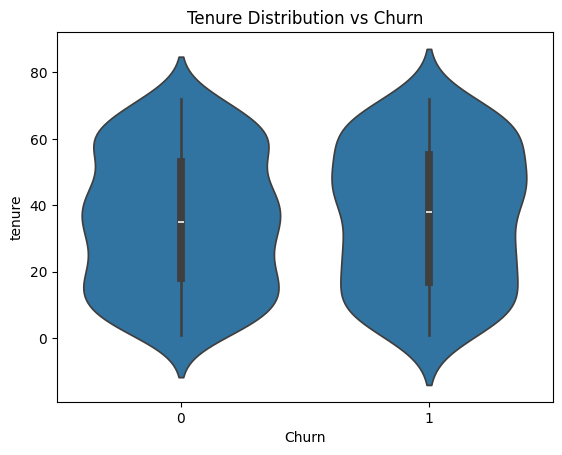

In [ ]:

#  TASK 6: Final Visualizations

# Box Plot
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

# Violin Plot
sns.violinplot(x='Churn', y='tenure', data=df)
plt.title("Tenure Distribution vs Churn")
plt.show()
